In [183]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import warnings


In [184]:
# Carregar o conjunto de dados
df = pd.read_csv("../data/raw/healthcare-dataset-stroke-data.csv")

In [185]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [187]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [188]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [189]:
df.duplicated().sum()

0

In [190]:
# Método de Z-score para identificar outliers.
z = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = np.where(z > 3)  # Identifica valores além de 3 desvios padrão
print("Outliers identificados:\n", outliers)


Outliers identificados:
 (array([   0,    0,    1, ..., 5093, 5100, 5105], dtype=int64), array([3, 6, 6, ..., 2, 2, 2], dtype=int64))


In [191]:
# Cria uma lista de tuplas com (linha, coluna) para cada outlier identificado
outliers_list = [(row, col) for row, col in zip(outliers[0], outliers[1])]

# Ordena a lista de tuplas pelo nome da coluna
outliers_list = sorted(outliers_list, key=lambda x: df.columns[x[1]])

# Exibe os valores dos outliers, agora agrupados por coluna
for row, col in outliers_list:
    print(f"Outlier na linha {row}, coluna {df.columns[col]}: valor = {df.iloc[row, col]}")


Outlier na linha 4, coluna age: valor = 79.0
Outlier na linha 6, coluna age: valor = 74.0
Outlier na linha 10, coluna age: valor = 81.0
Outlier na linha 15, coluna age: valor = 50.0
Outlier na linha 17, coluna age: valor = 75.0
Outlier na linha 21, coluna age: valor = 52.0
Outlier na linha 30, coluna age: valor = 57.0
Outlier na linha 32, coluna age: valor = 82.0
Outlier na linha 35, coluna age: valor = 82.0
Outlier na linha 37, coluna age: valor = 72.0
Outlier na linha 44, coluna age: valor = 60.0
Outlier na linha 45, coluna age: valor = 76.0
Outlier na linha 49, coluna age: valor = 39.0
Outlier na linha 51, coluna age: valor = 78.0
Outlier na linha 53, coluna age: valor = 77.0
Outlier na linha 58, coluna age: valor = 73.0
Outlier na linha 59, coluna age: valor = 54.0
Outlier na linha 61, coluna age: valor = 80.0
Outlier na linha 62, coluna age: valor = 67.0
Outlier na linha 65, coluna age: valor = 78.0
Outlier na linha 69, coluna age: valor = 80.0
Outlier na linha 71, coluna age: val

In [192]:
warnings.filterwarnings("ignore", category=UserWarning)

# Teste de Shapiro-Wilk para normalidade:
# - Valor-p > 0.05: indica que a variável segue uma distribuição normal (não rejeitamos a hipótese nula de normalidade).
# - Valor-p < 0.05: indica que a variável não segue uma distribuição normal (rejeitamos a hipótese nula).
for column in df.select_dtypes(include=[np.number]).columns:
    stat, p = shapiro(df[column])
    print(f'Teste de Shapiro-Wilk para {column}: p-value={p}')


Teste de Shapiro-Wilk para id: p-value=1.4698597740437648e-37
Teste de Shapiro-Wilk para age: p-value=1.3789355302240375e-32
Teste de Shapiro-Wilk para hypertension: p-value=6.506703004293783e-87
Teste de Shapiro-Wilk para heart_disease: p-value=3.624412104585787e-90
Teste de Shapiro-Wilk para avg_glucose_level: p-value=1.795389063729762e-61
Teste de Shapiro-Wilk para bmi: p-value=nan
Teste de Shapiro-Wilk para stroke: p-value=1.2844630928227437e-90


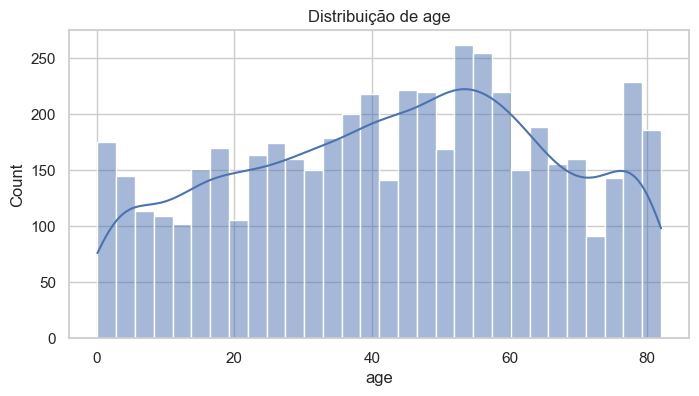

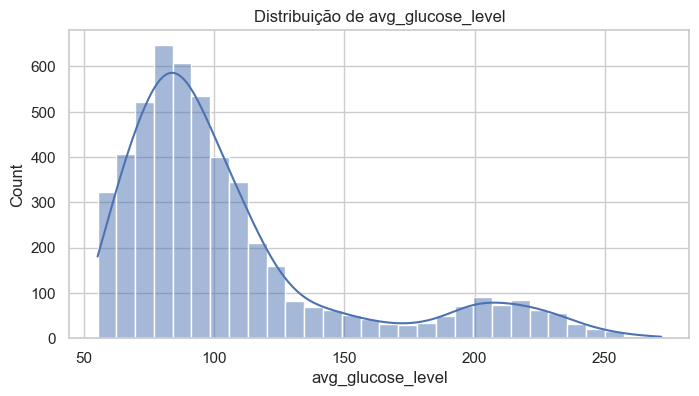

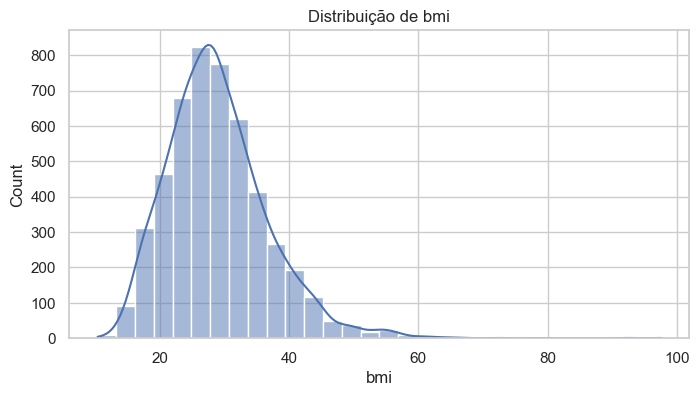

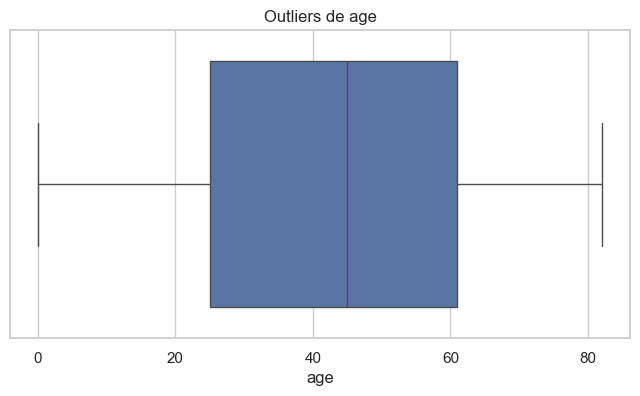

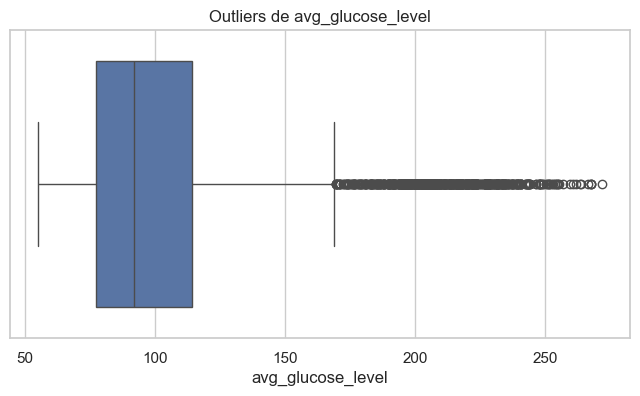

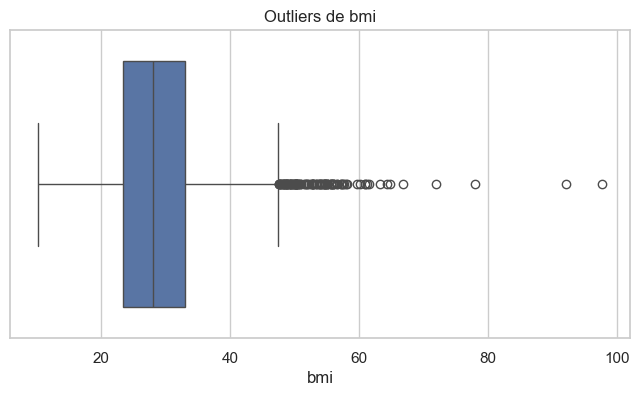

In [193]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Visualizar distribuições das variáveis numéricas
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.show()

# Boxplots para detectar outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Outliers de {col}")
    plt.show()


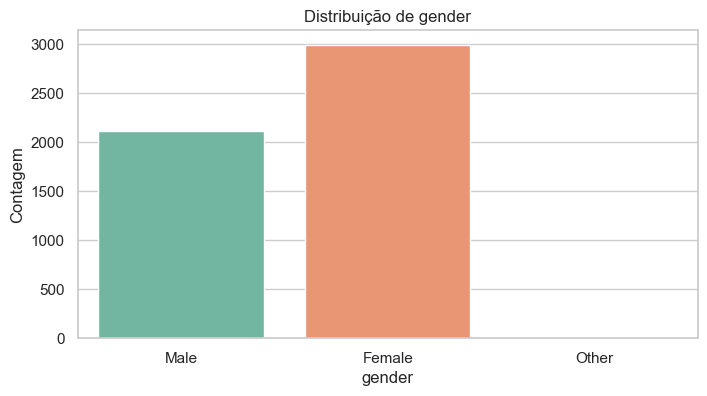

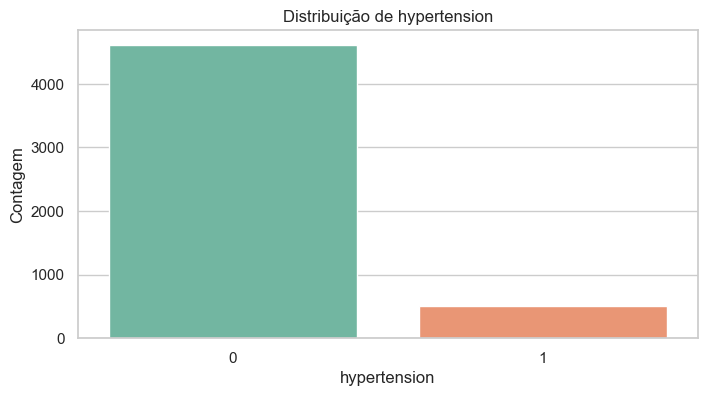

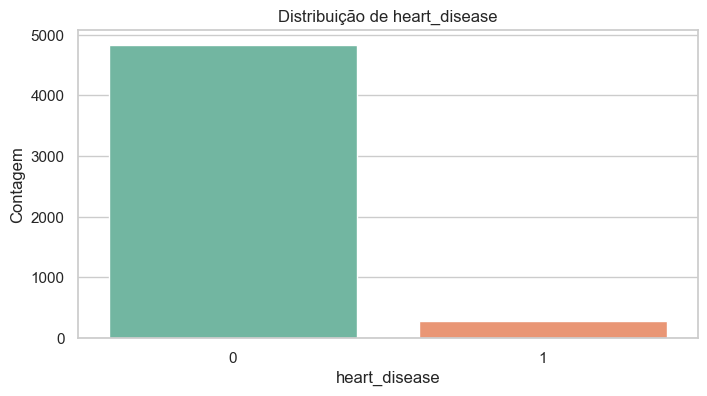

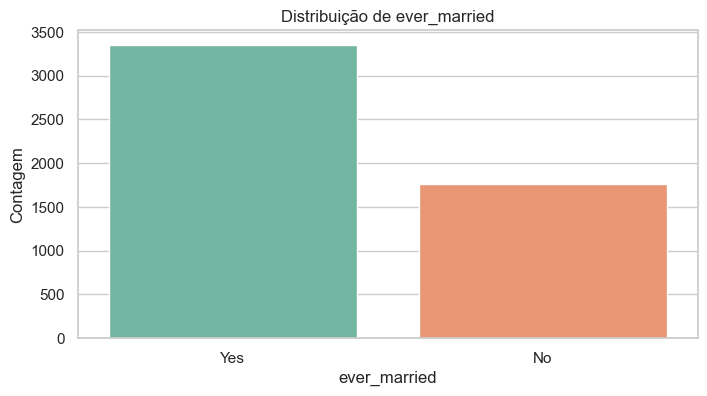

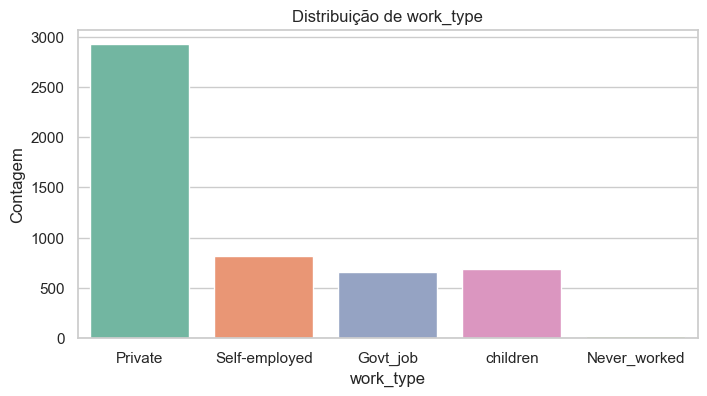

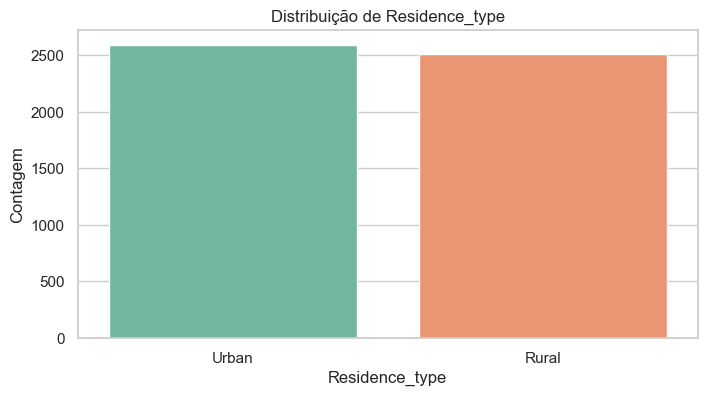

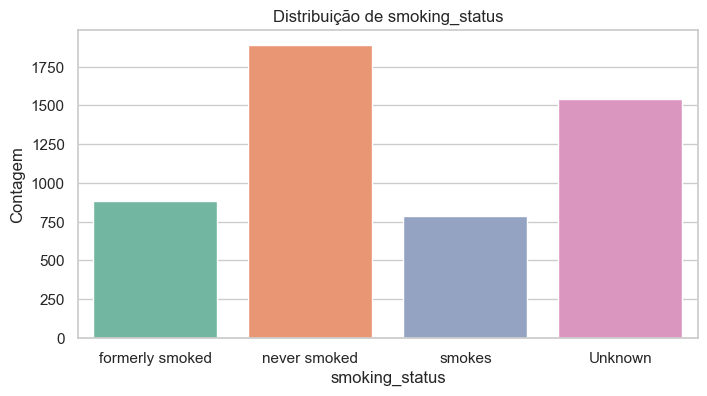

In [194]:
# Visualizar contagens de variáveis categóricas
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.show()


In [195]:
# Selecionando apenas colunas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Detecção de outliers usando o método IQR
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Criando um DataFrame booleano para identificar os outliers
outliers = (numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))

print("Outliers detectados por coluna:")
print(outliers.sum())


Outliers detectados por coluna:
id                     0
age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  110
stroke               249
dtype: int64


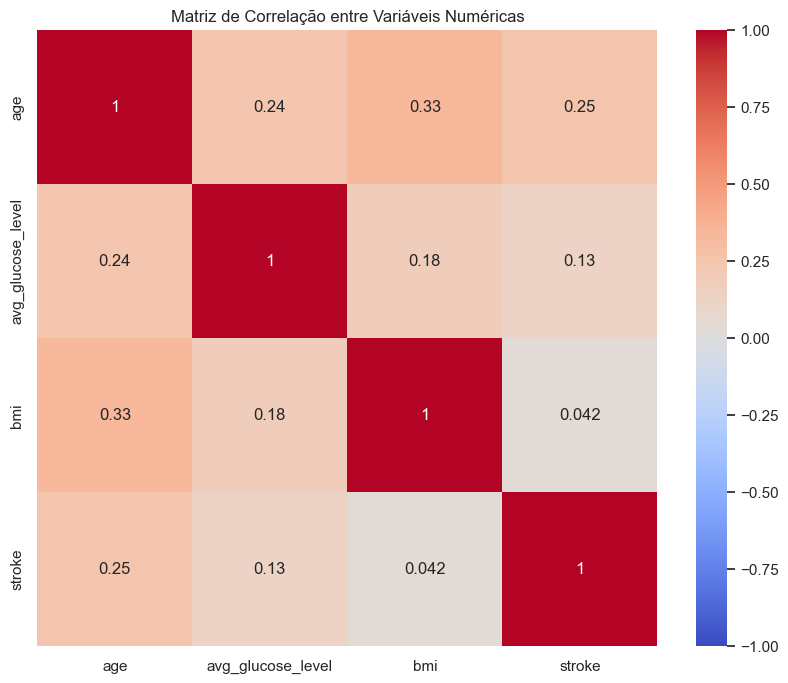

In [196]:
# Calcular e visualizar matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols + ['stroke']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


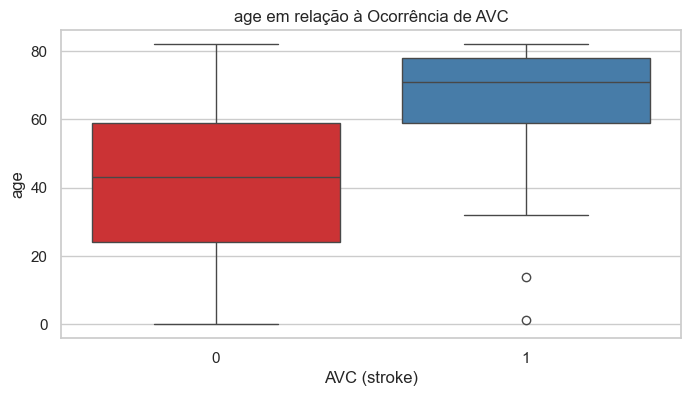

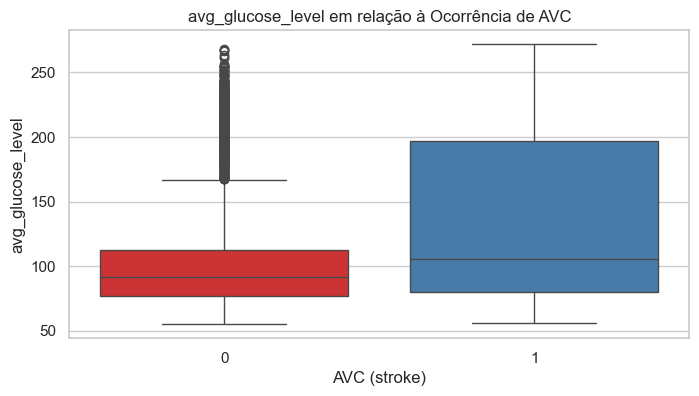

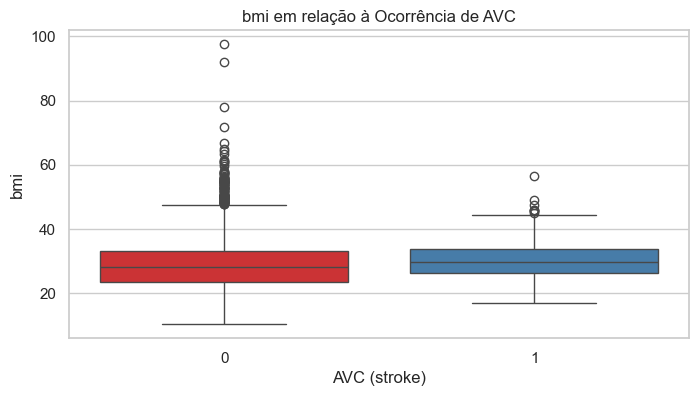

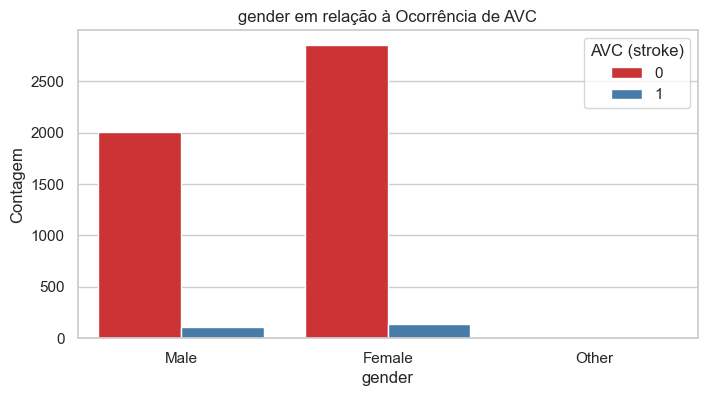

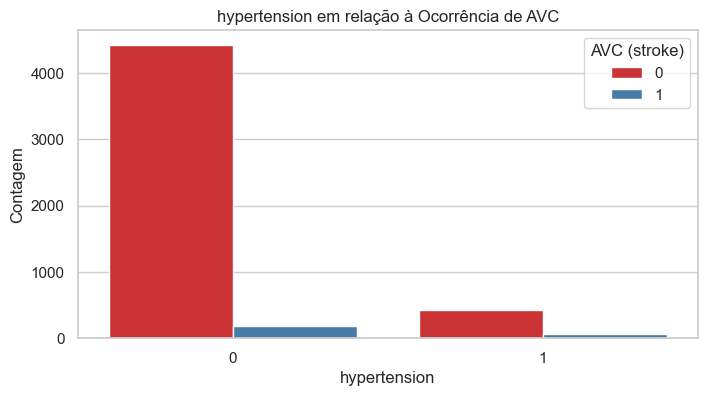

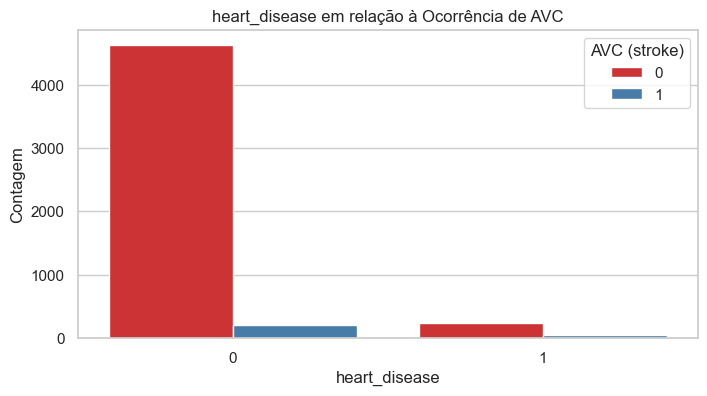

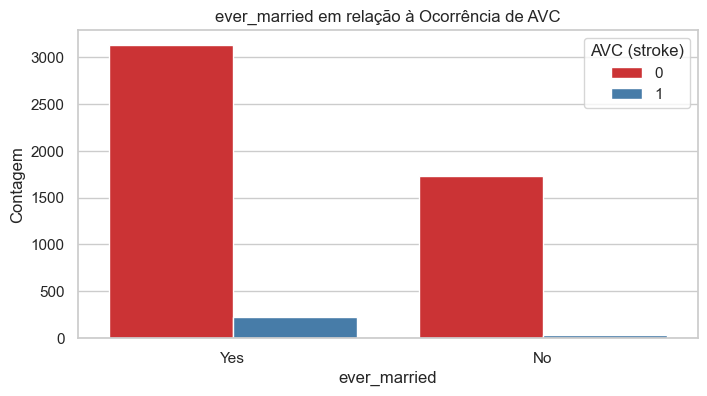

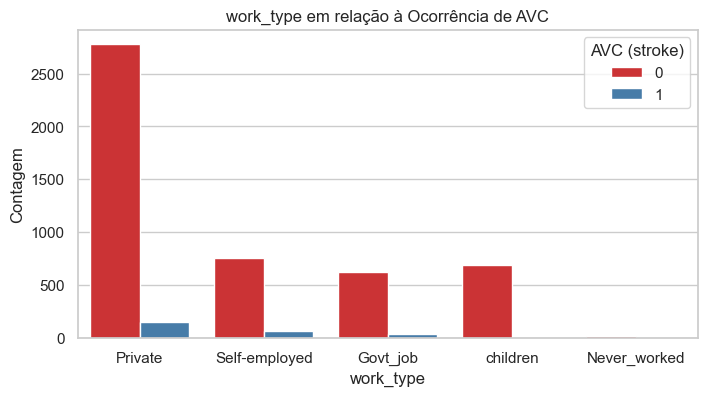

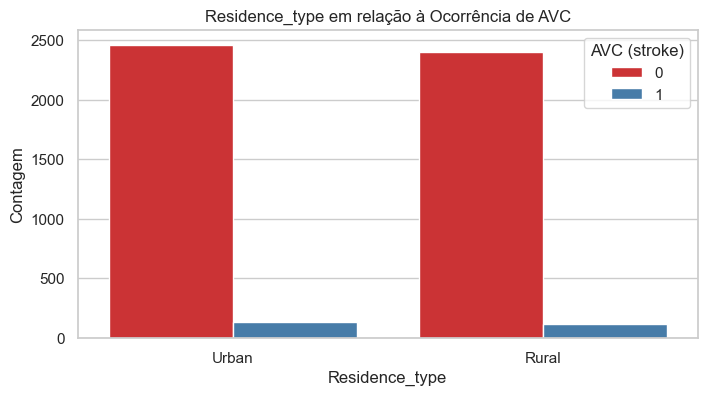

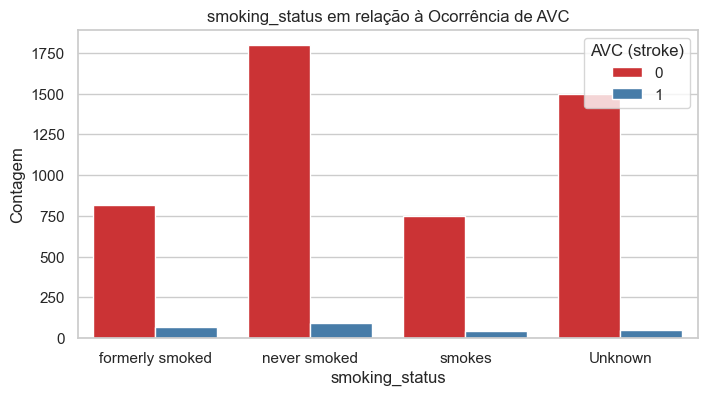

In [197]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Boxplot de variáveis numéricas em relação à variável-alvo 'stroke'
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="stroke", y=col, palette="Set1")
    plt.title(f"{col} em relação à Ocorrência de AVC")
    plt.xlabel("AVC (stroke)")
    plt.ylabel(col)
    plt.show()

# Análise de variáveis categóricas em relação à variável-alvo 'stroke'
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="stroke", palette="Set1")
    plt.title(f"{col} em relação à Ocorrência de AVC")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.legend(title="AVC (stroke)", loc='upper right')
    plt.show()


In [198]:
# Realizar teste T para avaliar diferenças nas médias entre grupos de AVC e não-AVC
for col in num_cols:
    grupo1 = df[df['stroke'] == 1][col].dropna()
    grupo0 = df[df['stroke'] == 0][col].dropna()
    stat, p = stats.ttest_ind(grupo1, grupo0)
    print(f"Teste T para {col}: estatística={stat:.4f}, p-valor={p:.4f}")


Teste T para age: estatística=18.0808, p-valor=0.0000
Teste T para avg_glucose_level: estatística=9.5134, p-valor=0.0000
Teste T para bmi: estatística=2.9709, p-valor=0.0030


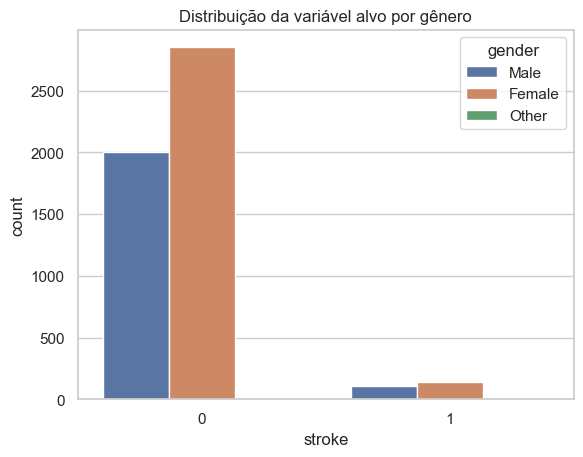

In [199]:
# Countplots por categoria da variável alvo
sns.countplot(data=df, x='stroke', hue='gender')  # Exemplo de uso com uma variável categórica
plt.title('Distribuição da variável alvo por gênero')
plt.show()


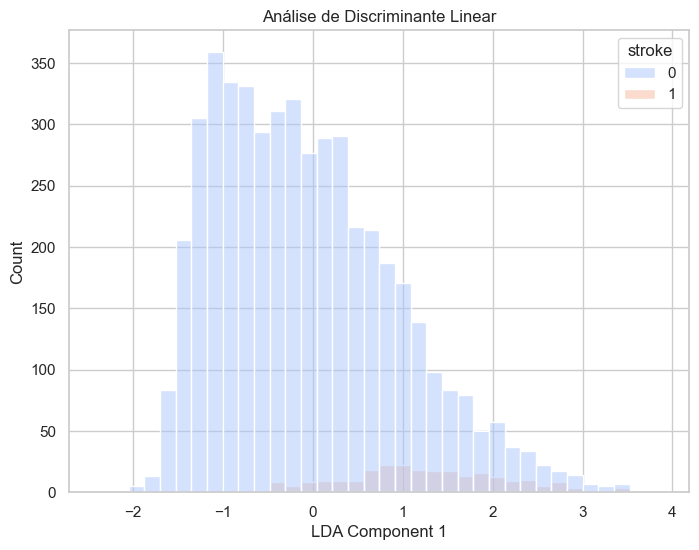

In [200]:
# Convertendo lda_transformed para DataFrame e combinando com a coluna de rótulos
lda_df = pd.DataFrame(lda_transformed, columns=["LDA Component 1"])
lda_df["stroke"] = df["stroke"]  # Adiciona a coluna 'stroke' ao novo DataFrame

# Plotando com Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=lda_df, x="LDA Component 1", hue="stroke", palette="coolwarm")
plt.title("Análise de Discriminante Linear")
plt.show()


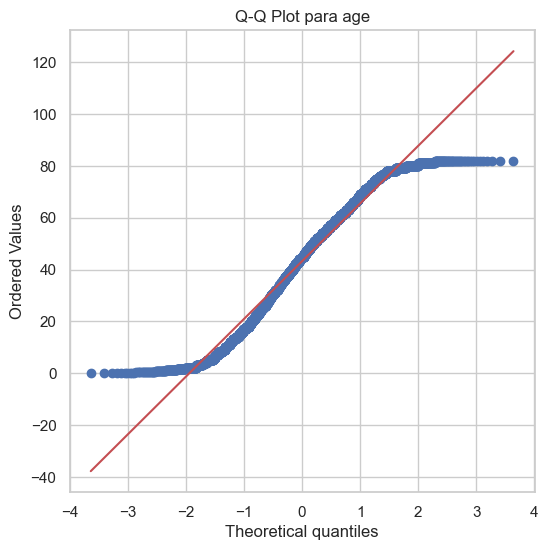

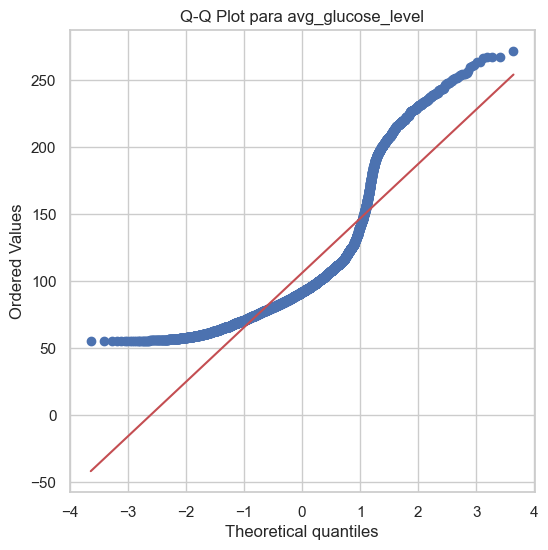

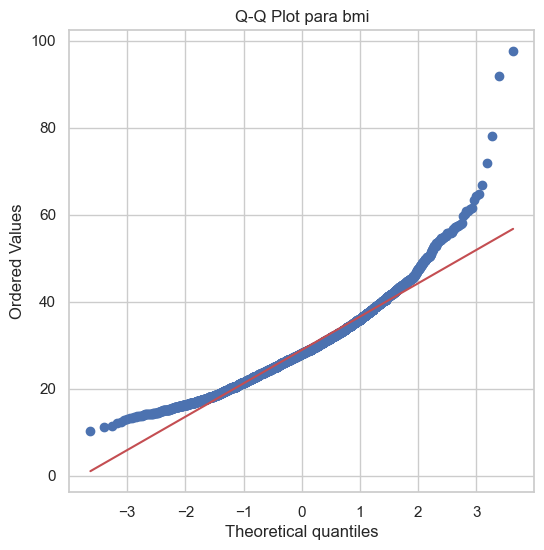

In [201]:
# Gráficos Q-Q para cada variável contínua, para verificar a normalidade das variáveis.
for var in 'age', 'avg_glucose_level', 'bmi':
    plt.figure(figsize=(6, 6))
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot para {var}')
    plt.show()


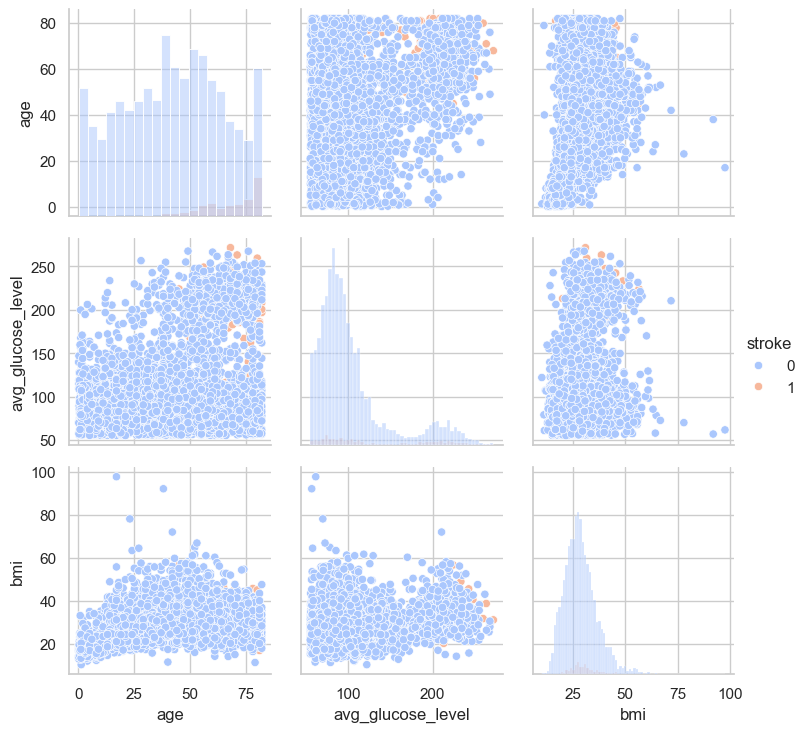

In [202]:
# PairGrid para visualizar correlação entre variáveis contínuas
g = sns.PairGrid(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue="stroke", palette='coolwarm')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
